# Supervised learning: House price prediction
----------------------------------------------------------

## Context:
The housing market is one of the most crucial parts of the economy for any country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) includes several features of the houses along with their sale prices at the time they are sold. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset provide a lot of values and applications for not only real estate businesses, but also for home buyers.

## About the Dataset:
Below is a brief version of different features of the dataset:

* **SalePrice** - the property's sale price in dollars. 
* **MSSubClass** - The building class
* **MSZoning** - The general zoning classification
* **LotFrontage** - Linear feet of street connected to property
* **LotArea** - Lot size in square feet
* **Street** -  Type of road access
* **Alley** - Type of alley access
* **LotShape** - General shape of property
* **LandContour** - Flatness of the property
* **Utilities** - Type of utilities available
* **LotConfig** - Lot configuration
* **LandSlope** - Slope of property
* **Neighborhood** - Physical locations within Ames city limits
* **Condition1** - Proximity to main road or railroad
* **Condition2** - Proximity to main road or railroad (if a second is present)
* **BldgType** - Type of dwelling
* **HouseStyle** - Style of dwelling
* **OverallQual** - Overall material and finish quality
* **OverallCond** - Overall condition rating
* **YearBuilt** - Original construction date
* **YearRemodAdd** - Remodel date
* **RoofStyle** - Type of roof
* **RoofMatl** - Roof material
* **Exterior1st** - Exterior covering on house
* **Exterior2nd** - Exterior covering on house (if more than one material)
* **MasVnrType** - Masonry veneer type
* **MasVnrArea** - Masonry veneer area in square feet
* **ExterQual** - Exterior material quality
* **ExterCond** - Present condition of the material on the exterior
* **Foundation** - Type of foundation
* **BsmtQual** - Height of the basement
* **BsmtCond** - General condition of the basement
* **BsmtExposure** - Walkout or garden level basement walls
* **BsmtFinType1** - Quality of basement finished area
* **BsmtFinSF1** - Type 1 finished square feet
* **BsmtFinType2** - Quality of second finished area (if present)
* **BsmtFinSF2** - Type 2 finished square feet
* **BsmtUnfSF** - Unfinished square feet of basement area
* **TotalBsmtSF** - Total square feet of basement area
* **Heating** - Type of heating
* **HeatingQC** - Heating quality and condition
* **CentralAir** - Central air conditioning
* **Electrical** - Electrical system
* **1stFlrSF** - First Floor square feet
* **2ndFlrSF** - Second floor square feet
* **LowQualFinSF** - Low quality finished square feet (all floors)
* **GrLivArea** - Above grade (ground) living area square feet
* **BsmtFullBath** - Basement full bathrooms
* **BsmtHalfBath** - Basement half bathrooms
* **FullBath** - Full bathrooms above grade
* **HalfBath** - Half baths above grade
* **Bedroom** - Number of bedrooms above basement level
* **Kitchen** - Number of kitchens
* **KitchenQual** - Kitchen quality
* **TotRmsAbvGrd** - Total rooms above grade (does not include bathrooms)
* **Functional** - Home functionality rating
* **Fireplaces** - Number of fireplaces
* **FireplaceQu** - Fireplace quality
* **GarageType** - Garage location
* **GarageYrBlt** - Year garage was built
* **GarageFinish** - Interior finish of the garage
* **GarageCars** - Size of garage in car capacity
* **GarageArea** - Size of garage in square feet
* **GarageQual** - Garage quality
* **GarageCond** - Garage condition
* **PavedDrive** - Paved driveway
* **WoodDeckSF** - Wood deck area in square feet
* **OpenPorchSF** - Open porch area in square feet
* **EnclosedPorch** - Enclosed porch area in square feet
* **3SsnPorch** - Three season porch area in square feet
* **ScreenPorch** - Screen porch area in square feet
* **PoolArea** - Pool area in square feet
* **PoolQC** - Pool quality
* **Fence** - Fence quality
* **MiscFeature** - Miscellaneous feature not covered in other categories
* **MiscVal** - Value of miscellaneous feature
* **MoSold** - Month Sold
* **YrSold** - Year Sold
* **SaleType** - Type of sale
* **SaleCondition** - Condition of sale


## Table of Content:
I. Loading the dataset

II. Data cleaning and Exploratory Data Analysis (EDA)
    1. Column datatype and missing values 
    2. Explore numerical variables
    3. Remove outliners
    4. Explore categorical variables

III. Feature transforming and Feature engineering
    1. Feature encoding
    2. Featue engineering

IV. Building regression model
    1. OLS regression model
    2. Ridge regression
    3. Lasso regression
    4. ElasticNet regression
    
Now let's start!

### I.  Load the dataset:

In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.model_selection as ms

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

from sqlalchemy import create_engine

# Pandas display preferences.
%matplotlib inline
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Query the database to extract dataset:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM houseprices', con=engine)

# Dispose the connection, as we're only doing a single query:
engine.dispose()

# Print out the head of the dataset:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


### II. Exploratory Data Analysis (EDA) 
### 1. Inspect column datatypes and missing values:

In [3]:
# Inspect column datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [4]:
# Calculate the % of missing values per each column:
null = df.isnull().sum()/len(df)
null[null>0]

lotfrontage    0.177
alley          0.938
masvnrtype     0.005
masvnrarea     0.005
bsmtqual       0.025
bsmtcond       0.025
bsmtexposure   0.026
bsmtfintype1   0.025
bsmtfintype2   0.026
electrical     0.001
fireplacequ    0.473
garagetype     0.055
garageyrblt    0.055
garagefinish   0.055
garagequal     0.055
garagecond     0.055
poolqc         0.995
fence          0.808
miscfeature    0.963
dtype: float64

As we can see, there are 4 columns that have more than 80% missing values. Since these columns don't add much value to the dataset, we'll go ahead and drop them.

In [5]:
# Drop columns with over 80% of missing data. 
# We'll also drop 'id' column since we don't need id for our analysis
df = df.drop(['alley', 'poolqc', 'fence', 'miscfeature', 'id'], axis=1)

In [6]:
# Some numerical features(the building class and month sold) are actually categorical. 
# We'll convert them back to categorical variables:
df = df.replace({'mssubclass' : {20 : 'SC20', 30 : 'SC30', 40 : 'SC40', 45 : 'SC45', 50 : 'SC50', 
                                 60 : 'SC60', 70 : 'SC70', 75 : 'SC75', 80 : 'SC80', 85 : 'SC85', 
                                 90 : 'SC90', 120 : 'SC120', 150 : 'SC150', 160 : 'SC160', 
                                 180 : 'SC180', 190 : 'SC190'}, 
                 'mosold' : {1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun',
                             7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}})

In [7]:
# Fill in missing values with mean value for each numerical variable:
df['lotfrontage'] = df['lotfrontage'].fillna(df['lotfrontage'].mean())
df['masvnrarea'] = df['masvnrarea'].fillna(df['masvnrarea'].mean())

# Fill in missing values with the most frequent value for each categorical variable:
cols = ['masvnrtype', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'fireplacequ',
        'electrical', 'garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond']

for col in cols:
    df[col] = df[col].fillna(df[col].value_counts().index[0])
    
# Check to make sure there's no missing data:
null = df.isnull().sum()/len(df)
null[null>0]

Series([], dtype: float64)

### 2. Explore numerical variables:

In [8]:
# Inspect numeric variables:
df_num = df.select_dtypes(['int64', 'float64']).columns
print(df_num)
print('')
print('The number of numerical columns is {}'.format(len(df_num)))

Index(['lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'yrsold', 'saleprice'], dtype='object')

The number of numerical columns is 35


In [9]:
# As we can see above, there are 35 numerical variables in our dataset. 
# Let's statistically explore these variables.
df.describe()

,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,yrsold,saleprice
count,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1979.976,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,2007.816,180921.196
std,22.024,9981.265,1.383,1.113,30.203,20.645,180.569,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.750,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,1.328,79442.503
min,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2006.000,34900.000
25%,60.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1962.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2007.000,129975.000
50%,70.050,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1984.500,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,2008.000,163000.000
75%,79.000,11601.500,7.000,6.000,2000.000,2004.000,164.250,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2003.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,2009.000,214000.000
max,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,2010.000,755000.000


Screening through the numerical variables, we can see a common theme that the variables tend to describe:
* Square footage
* Time
* Room and amenities
* Condition and quality

The oldest house was build in 1872!, and the most expensive house in Ames, Iowa in our dataset was sold for $755,000

To explore how different features interact with houseprice, we will plot some correlation heatmaps to better understand the correlations between variables:
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

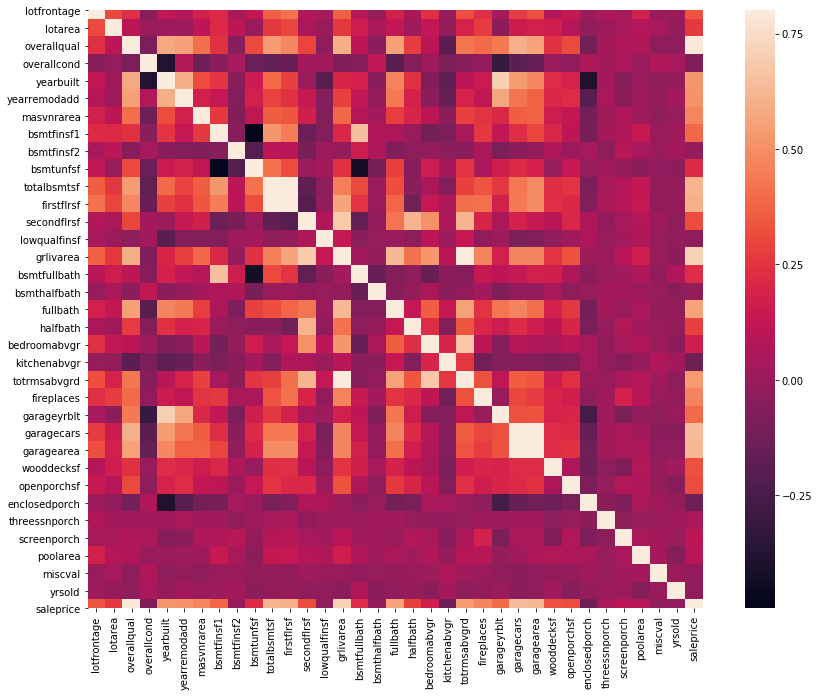

In [10]:
# Correlation matrix. Just a reminder, correlation matrix only applies for numerical variables.
corrmat = df.corr()
plt.subplots(figsize=(15, 11))
sns.heatmap(corrmat, vmax=.8, square=True)

This heatmap gives us a quick overview of our variables and their relationships to each other. At first sight, there are a few white colored squares that get my attention.
* 'totalbsmtsf' and '1stflrsf'
* 'garagearea' and 'garagecars'
* 'totrmsabvgrd' and 'grlivarea'

All cases above show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. It's obvious that the bigger the garage area, the more cars you can fit in, so garagecars also increases. Since they pretty much explain one another, we'll drop one of the highly correlated variables in the set.

Another thing that got my attention was the 'saleprice' correlations. We can see some features that highly correlated to 'saleprice'. They are 'overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'fullbath', and  'garagecars'.

Now let's zoom in an take a look at the 'saleprice' correlation matrix

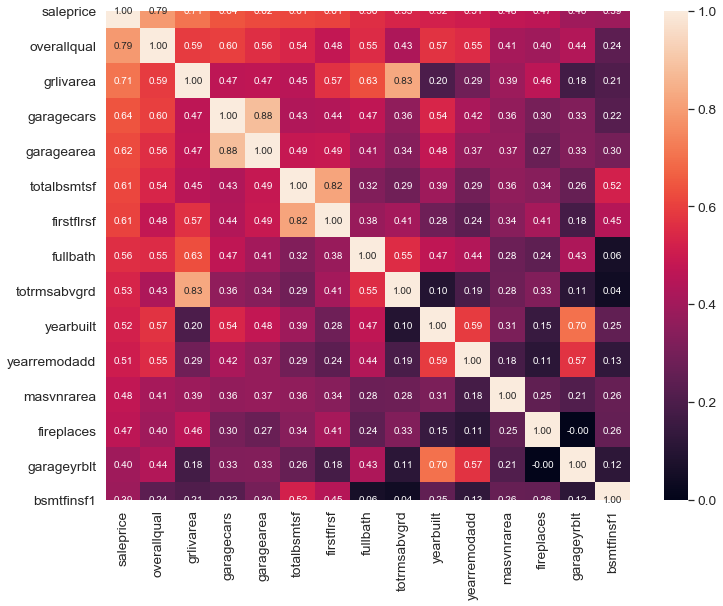

In [11]:
# Saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'saleprice')['saleprice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our heatmap, these are the variables most correlated with 'saleprice':

* 'overallaual', 'grlivarea' and 'garagecars' are strongly correlated with 'saleprice'.
* 'garagecars' and 'garagearea' are also some of the most strongly correlated variables. However, as we discussed earlier, the number of cars that fit into the garage is a consequence of the garage area. Therefore, we just need one of these variables in our analysis (we can keep 'garagecars' since its correlation with 'saleprice' is higher).
* 'totalbBsmtsf' and '1stfloor' also seem to be twin brothers. We can keep 'totalbsmtsf'.
* 'fullbath' with a 56% correlation
* 'totrmsabvgrd' and 'grlivarea' are twin again

#### Drop columns that are highly correlated to avoid mulicollinearity

In [12]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 70%
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print(to_drop)

['firstflrsf', 'totrmsabvgrd', 'garageyrblt', 'garagearea', 'saleprice']


In [13]:
# We'll drop variables stated above except for the target variable 'saleprice':
df = df.drop(['firstflrsf', 'totrmsabvgrd', 'garageyrblt', 'garagearea'], axis=1)

Now let's take a look at how these numeric features interact with saleprice:

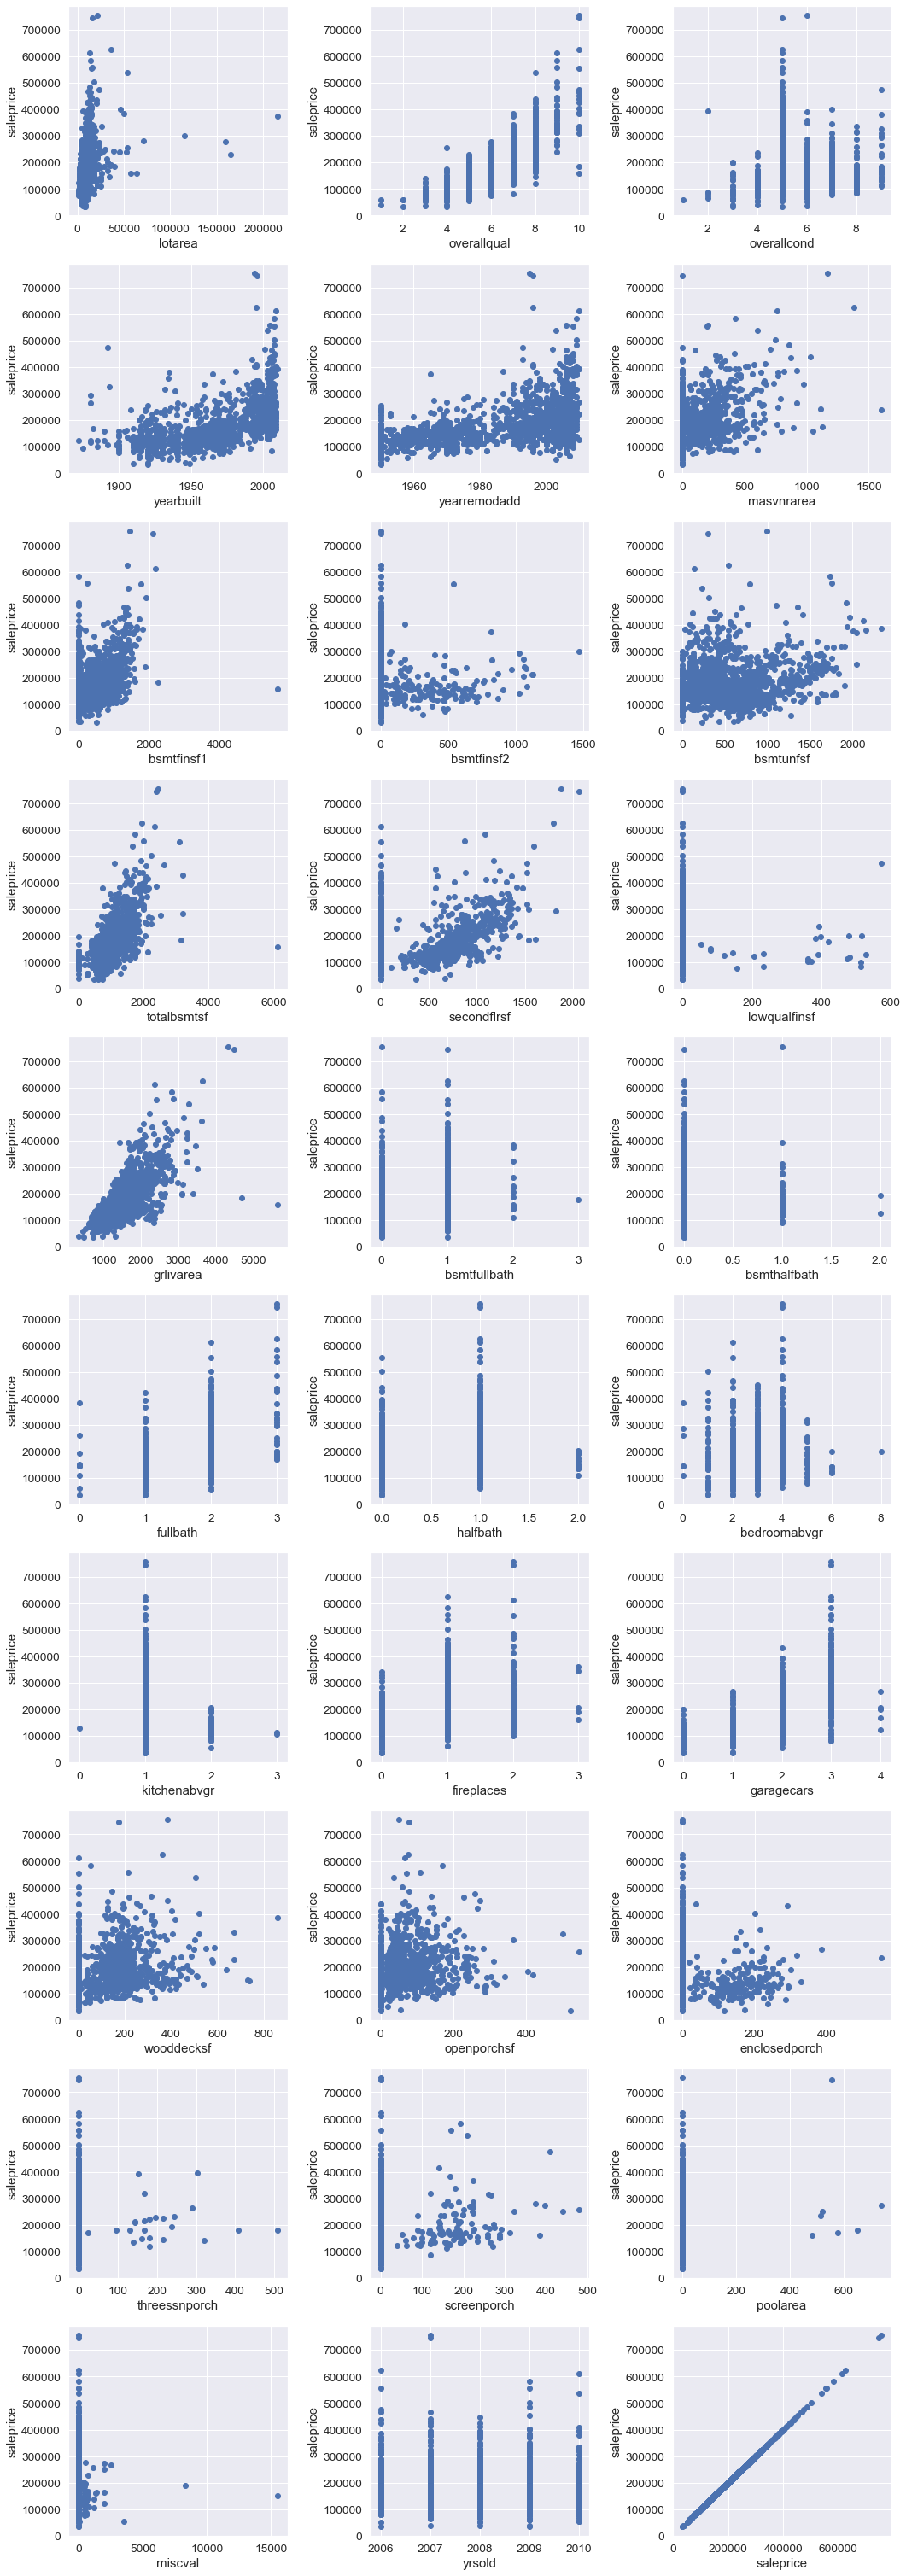

In [14]:
# Plot scatter plot of features against saleprice:
df_num = df.select_dtypes(['int64', 'float64']).columns

fig = plt.figure(figsize=(15,50))
for i, col in enumerate(df_num[1:]):
    fig.add_subplot(12,3,i+1)
    plt.scatter(df[col], df['saleprice'])
    plt.xlabel(col)
    plt.ylabel('saleprice')
fig.tight_layout()
fig.show()

Observing the graphs, we can see that:
* Many of the variables are discrete and not continuous. As mentioned earlier in the histograms, dimension-related variables seem to follow a similar pattern as the saleprice and might be good indicators.
* Many features do not have a strong relationship with saleprice, such as 'lowqualfinsf', 'bsmtfnsf2', 'threessnporch', 'poolarea', etc.
* We also see that there are outliners in our dataset. For example, if we look at the plot that shows saleprice against saleprice, we can see there are 2 outliners at the top right corner of the plot.

### 3. Removing outliners

In [15]:
# Let's take a look at possible outliners in numerical variables:
cols = ['grlivarea', 'totalbsmtsf', 'masvnrarea','enclosedporch', 'openporchsf', 'lotarea', 'bedroomabvgr', 'lotarea', 'bsmtfinsf2']

outliners=[]

for col in cols:
    index = df[col].sort_values(ascending=False).head(3).index
    value = df[col].sort_values(ascending=False).head(3).values
    outliners.append(index)
    outliners.append(value)
outliners

[Int64Index([1298, 523, 1182], dtype='int64'),
 array([5642, 4676, 4476]),
 Int64Index([1298, 333, 497], dtype='int64'),
 array([6110, 3206, 3200]),
 Int64Index([298, 1169, 691], dtype='int64'),
 array([1600., 1378., 1170.]),
 Int64Index([198, 747, 1197], dtype='int64'),
 array([552, 386, 330]),
 Int64Index([1328, 496, 583], dtype='int64'),
 array([547, 523, 502]),
 Int64Index([314, 336, 250], dtype='int64'),
 array([215245, 164660, 159000]),
 Int64Index([635, 292, 843], dtype='int64'),
 array([8, 6, 6]),
 Int64Index([314, 336, 250], dtype='int64'),
 array([215245, 164660, 159000]),
 Int64Index([323, 542, 471], dtype='int64'),
 array([1474, 1127, 1120])]

In [16]:
# Let's drop the rows that contain outliners
index=[1298, 523, 298, 198, 314, 323]    

df.drop(df.index[index], inplace=True)
df.shape

(1454, 72)

 #### Use log transform on skewed numeric features to bring them closer to a normal distribution

Skewness: 1.894909
Kurtosis: 6.618216


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e6e85d0>,
      dtype=object)

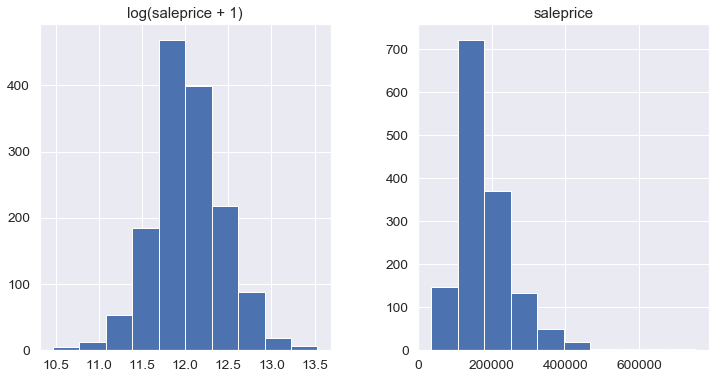

In [17]:
# Let's first take a look at the target variable (saleprice). As we can see from the chart below, saleprice is
# not normally distributed. It is right skewed. Let's see what's the skewness of saleprice variable:
print("Skewness: %f" % df['saleprice'].skew())
print("Kurtosis: %f" % df['saleprice'].kurt())

# Visualize distribution before and after log transformation:
sns.set_style('darkgrid')

prices = pd.DataFrame({'log(saleprice + 1)':np.log1p(df['saleprice']), 'saleprice':df['saleprice']})
prices.hist(figsize=(12,6))

After log transform, 'saleprice' variable looks a lot more similar to a normal distribution. This is important because our linear regression assumes that all features are normally distributed. Because of that, let's inspect other numeric variables and use log transform on those features that have high skewedness.

####  Use log transformation to transform any variables in the dataset with >0.75 skewness

In [18]:
# Find numeric features for any features with skewness >0.75:
feats = df.dtypes[df.dtypes != 'object'].index

skewed_feats = df[feats].apply(lambda x: x.skew()) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

print('The columns that are highly skewed are: ', skewed_feats)

# Transform highly skewed features:
df[skewed_feats] = np.log1p(df[skewed_feats])

The columns that are highly skewed are:  Index(['lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmthalfbath', 'kitchenabvgr', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'saleprice'], dtype='object')


### 4. What about categorical variables? Let's take a look at them

In [19]:
# Inspect non-numeric variables:
df_object = df.select_dtypes(include = 'object').columns
print(df_object)
print('')
print("The number of non-numerical columns is {}".format(len(df_object)))

Index(['mssubclass', 'mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'mosold', 'saletype', 'salecondition'], dtype='object')

The number of non-numerical columns is 41


In [20]:
# There are 41 categorical variables in this dataset. Let's take a look at what they are:
df.describe(include='object')

,mssubclass,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,mosold,saletype,salecondition
count,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,12,9,6
top,SC20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Jun,WD,Normal
freq,535,1146,1448,924,1308,1453,1048,1377,224,1257,1440,1214,725,1139,1429,514,503,870,905,1277,643,684,1342,989,467,1291,1423,737,1359,1329,734,1354,1067,948,685,1386,1401,1334,251,1263,1195


In [21]:
# Inspect any funky categorical value:
for i in df_object:
    print(df[i].value_counts())

SC20     535
SC60     295
SC50     144
SC120     87
SC30      69
SC160     63
SC70      60
SC80      58
SC90      52
SC190     30
SC85      20
SC75      15
SC45      12
SC180     10
SC40       4
Name: mssubclass, dtype: int64
RL         1146
RM          218
FV           64
RH           16
C (all)      10
Name: mszoning, dtype: int64
Pave    1448
Grvl       6
Name: street, dtype: int64
Reg    924
IR1    481
IR2     41
IR3      8
Name: lotshape, dtype: int64
Lvl    1308
Bnk      61
HLS      50
Low      35
Name: landcontour, dtype: int64
AllPub    1453
NoSeWa       1
Name: utilities, dtype: int64
Inside     1048
Corner      261
CulDSac      94
FR2          47
FR3           4
Name: lotconfig, dtype: int64
Gtl    1377
Mod      65
Sev      12
Name: landslope, dtype: int64
NAmes      224
CollgCr    150
OldTown    113
Edwards     98
Somerst     85
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      3

Scrolling through this list, I don't see any abnormal categories in our columns. Let's plot the categorical variables against sale price to see any interesting relationships.

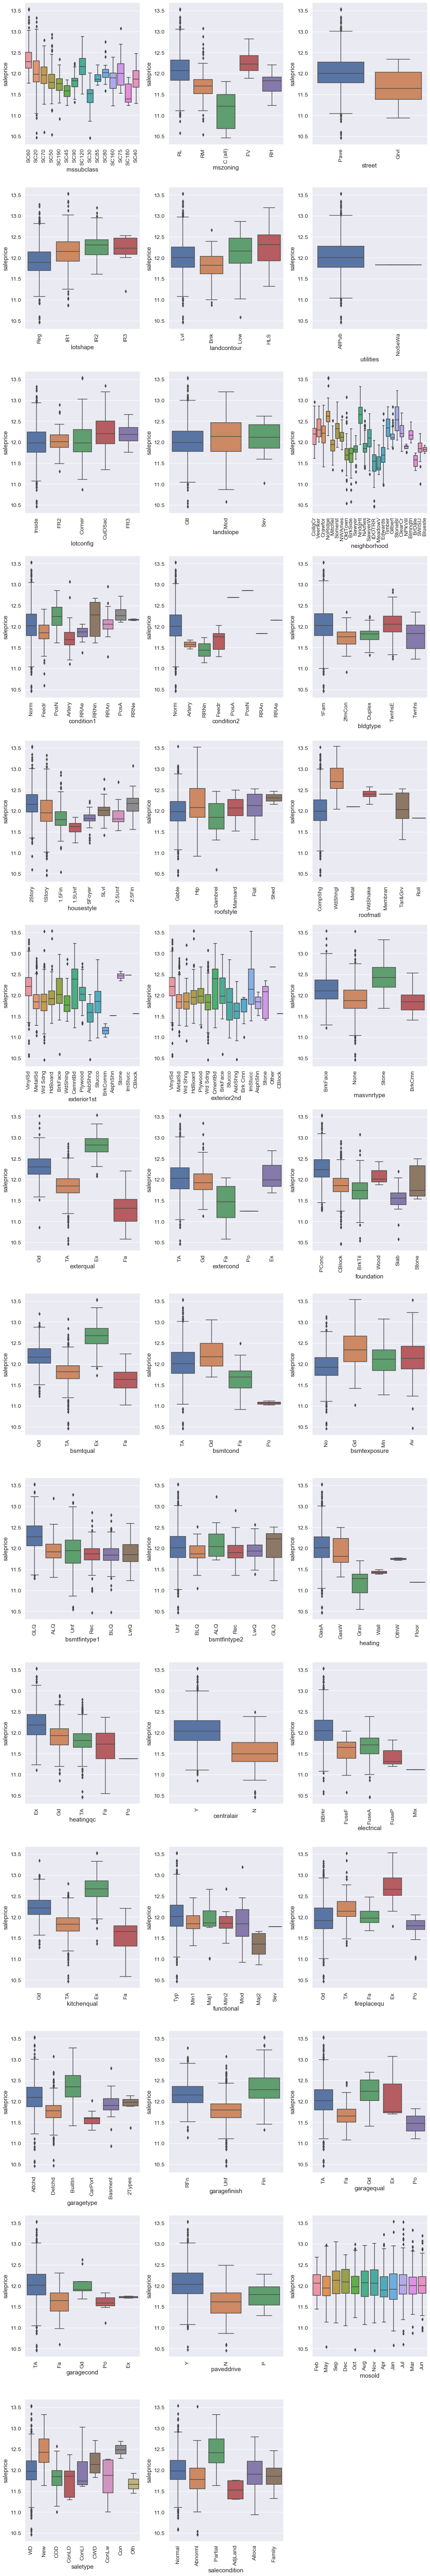

In [22]:
# Plot categorical variables against house saleprice to detect patterns:
fig = plt.figure(figsize=(15,100))
for i, col in enumerate(df_object):
    fig.add_subplot(16,3,i+1)
    sns.boxplot(df[col], df['saleprice'])
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('saleprice')
fig.tight_layout()
fig.show()

Some categories seem to drive saleprice more than others. Below are some interesting observations:
* Neighborhood has big impact on house prices
* PosN condition also impacts houseprice 
* WdShngl roof material seems to be the preference among home buyers
* BuiltIn garage type drives saleprice significantly higher than other types
* Partial salecondition sells for more than other conditions
* 'Excellent' everything is almost always valued higher than any other conditions

There are also differences in variabilities between category values.

### III. Feeature transforming and Feature Engineering

### 1. Feature encoding

In [23]:
# Encode categorical variables using one-hot-encoding technique:
df = pd.get_dummies(df, drop_first=True)
df.head()

,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,fireplaces,garagecars,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,yrsold,saleprice,mssubclass_SC160,mssubclass_SC180,mssubclass_SC190,mssubclass_SC20,mssubclass_SC30,mssubclass_SC40,mssubclass_SC45,mssubclass_SC50,mssubclass_SC60,mssubclass_SC70,mssubclass_SC75,mssubclass_SC80,mssubclass_SC85,mssubclass_SC90,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,mosold_Aug,mosold_Dec,mosold_Feb,mosold_Jan,mosold_Jul,mosold_Jun,mosold_Mar,mosold_May,mosold_Nov,mosold_Oct,mosold_Sep,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecond

In [24]:
df.shape

(1454, 255)

### 2. New features engineering 

Let's combine some features of the dataset to represent interactions between variables.

#### Internal feature engineering

In [25]:
# Overall bathrooms
df['totalbaths'] = df['fullbath'] + df['halfbath']*0.5  + df['bsmtfullbath'] + df['bsmthalfbath']*0.5
# Overall quality of the house
df['overallgrade'] = df['overallqual'] * df['overallcond']
# Total SF for house (incl. basement)
df['allsf'] = df['grlivarea'] + df['totalbsmtsf']
# Total SF for porch
df['allporchsf'] = df['openporchsf'] + df['enclosedporch'] + df['threessnporch'] + df['screenporch']
# Year build quality
df['yearaverage']= (df['yearremodadd']+df['yearbuilt'])/2

In [26]:
df['yrsold'].unique()

array([2008, 2007, 2006, 2009, 2010])

#### External feature creation

Housing market is an essential part of any economy. However, there are many other economic indicators that reflect the relationship between consumer behavior, consumer spending and housing prices. Some important ones are [GDP(Gross domestic products)](https://www.thebalance.com/us-gdp-by-year-3305543), [inflation](https://www.thebalance.com/u-s-inflation-rate-history-by-year-and-forecast-3306093) and [unemployment rate](https://www.thebalance.com/unemployment-rate-by-year-3305506). These indicators can reflect how strong the economy is, as the result, a strong housing market. 

Below, we'll use external sources to create new features('gdp', 'inflation', 'unemployment') to include in our models to potentially boost performance.

In [27]:
# Add 'gdp' feature (in trilion):
df['gdp'] = df['yrsold'].map({2006:15.338, 2007:15.626, 2008:15.605, 2009:15.209, 2010:15.599})

In [28]:
# Add 'inflation' feature:
df['inflation'] = df['yrsold'].map({2006:2.5, 2007:4.1, 2008:0.1, 2009:2.7, 2010:1.5})

In [29]:
# Add 'unemployment' feature:
df['unemployment'] = df['yrsold'].map({2006:4.4, 2007:5.0, 2008:7.3, 2009:9.9, 2010:9.3})

In [30]:
df.head()

,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,fireplaces,garagecars,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,yrsold,saleprice,mssubclass_SC160,mssubclass_SC180,mssubclass_SC190,mssubclass_SC20,mssubclass_SC30,mssubclass_SC40,mssubclass_SC45,mssubclass_SC50,mssubclass_SC60,mssubclass_SC70,mssubclass_SC75,mssubclass_SC80,mssubclass_SC85,mssubclass_SC90,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,mosold_Aug,mosold_Dec,mosold_Feb,mosold_Jan,mosold_Jul,mosold_Jun,mosold_Mar,mosold_May,mosold_Nov,mosold_Oct,mosold_Sep,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecond

### 4. Building models:

In [31]:
# Create target variable and exploratory variables:
df1 = df.copy()
df1.drop(['saleprice'], axis=1, inplace=True)

Y = df['saleprice'] # target variable
X = df1 # explanatory variable

In [32]:
# Split features and target variale into train and test set:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size = 0.2, random_state=2468)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1163, 262)
(1163,)
(291, 262)
(291,)


In [33]:
# Use RobustScaler to scale our dataset:
from sklearn.preprocessing import RobustScaler

scaler= RobustScaler()
# transform 'X_train'
X_train = scaler.fit_transform(X_train)
# transform 'X_test'
X_test = scaler.transform(X_test)

# Parameter optimization:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

#### Linear OLS Regression model:

In [34]:
from sklearn.linear_model import LinearRegression

# Train the model on training set:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print('R-squared of the model in training set is: {:.3f}'.format(lrm.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(lrm.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))

R-squared of the model in training set is: 0.950
-----Test set statistics-----
R-squared of the model in test set is: -515559591182576256.000
Mean absolute error of the prediction is: 21703270.025
Mean squared error of the prediction is: 85515683538347504.000
Root mean squared error of the prediction is: 292430647.399


Indicating from the statistics above, our OLS model did a terrible job at predicting house saleprice. The R-squared on the train set is way higher than on the test set. MAE, MSE and RMSE are all very high, indicating a bad job at prediction. let's try another regression model.

#### Ridge Regression model:

In [35]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization parameter (usually called lambda). 
# As alpha gets larger, parameter shrinkage grows more pronounced. We use a cross validation =10 in this case.
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print('Best alpha value is: {}'.format(ridge_cv.alpha_))
print('R-squared of the model in training set is: {:.3f}'.format(ridge_cv.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(ridge_cv.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 10.0
R-squared of the model in training set is: 0.941
-----Test set statistics-----
R-squared of the model in test set is: 0.932
Mean absolute error of the prediction is: 0.075
Mean squared error of the prediction is: 0.011
Root mean squared error of the prediction is: 0.106


Ridge regression did a lot better of a job at predicting house saleprice. As we can see, the R-squared for train set and test set are similar, indicating that our model did not overfit. MAE, MSE and RMSE are a lot smaller than when we used OLS regression model. Let's try out Lasso regression to see if it does a better job.

#### Lasso Regression model:

In [36]:
from sklearn.linear_model import Lasso

# Fitting a ridge regression model. Alpha is the regularization parameter (usually called lambda). 
# As alpha gets larger, parameter shrinkage grows more pronounced.
lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print('Best alpha value is: {}'.format(lasso_cv.alpha_))
print('R-squared of the model in training set is: {:.3f}'.format(lasso_cv.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(lasso_cv.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.929
-----Test set statistics-----
R-squared of the model in test set is: 0.931
Mean absolute error of the prediction is: 0.074
Mean squared error of the prediction is: 0.011
Root mean squared error of the prediction is: 0.107


Lasso regression did even a better job! MAE, MSE and RMSE are all smaller than those of OLS and Ridge regression. What if we try ElasticNet?

#### ElasticNet Regression model:

In [37]:
from sklearn.linear_model import ElasticNet

# Fitting a ridge regression model. Alpha is the regularization parameter (usually called lambda). 
# As alpha gets larger, parameter shrinkage grows more pronounced. Using cross validation =10
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=10)
elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print('Best alpha value is: {}'.format(elasticnet_cv.alpha_))
print('R-squared of the model in training set is: {:.3f}'.format(elasticnet_cv.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(elasticnet_cv.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.935
-----Test set statistics-----
R-squared of the model in test set is: 0.931
Mean absolute error of the prediction is: 0.074
Mean squared error of the prediction is: 0.011
Root mean squared error of the prediction is: 0.107


ElasticNet gives us almost the same results as Lasso. Since both of these models are better than OLS and Ridge regressions, we can use either one to test on new data and compare which model would give better prediction.